In [1]:
from referenceDatabase import ReferenceDatabase
from classify import Classifier
from error import ErrorPlotter
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
from PIL import Image


In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_path = './../data/4NSigComp2010/TrainingSet'
test_path = './../data/4NSigComp2010/TestSet'

# Train
ref_path = os.path.join(train_path, 'Reference')
genuine_path = os.path.join(train_path, 'Genuine')
disguised_path = os.path.join(train_path, 'Disguise')
simulated_path = os.path.join(train_path, 'Simulated')

# Test
ref_path_test = os.path.join(test_path, 'Reference')
que_path_test = os.path.join(test_path, 'Questioned')

## TRAIN

In [4]:
# Create Reference Database
ref_db = ReferenceDatabase(ref_path)
stable_DB, unstable_DB = ref_db.kp_DB()

In [5]:
# Save the reference database
with open('./pickles/stable_DB.pkl', 'wb') as f:
    pickle.dump(stable_DB, f)
    
with open('./pickles/unstable_DB.pkl', 'wb') as f:
    pickle.dump(unstable_DB, f)

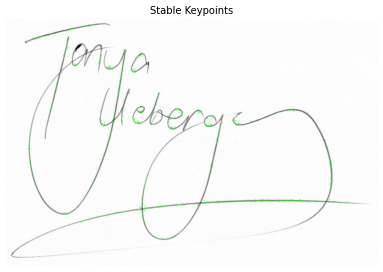

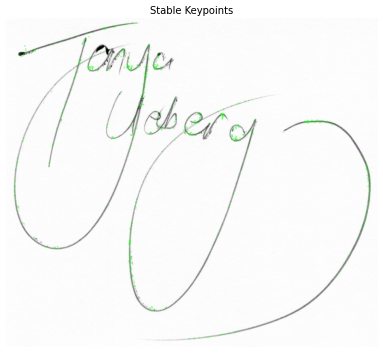

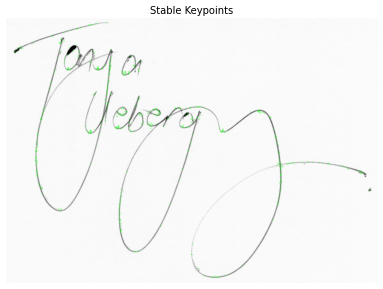

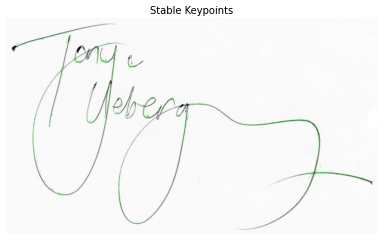

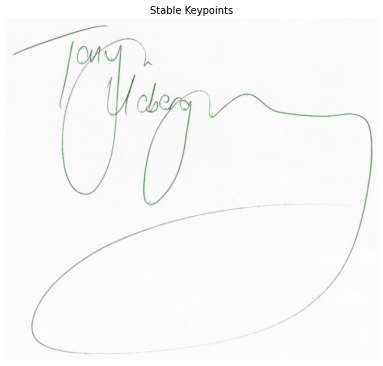

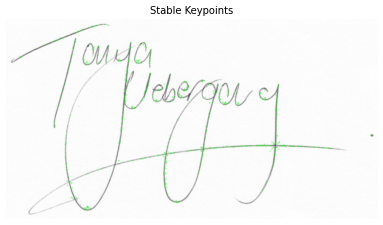

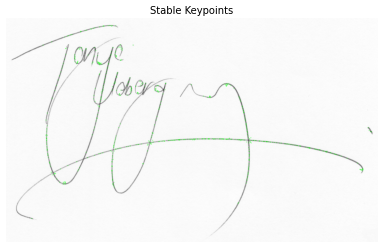

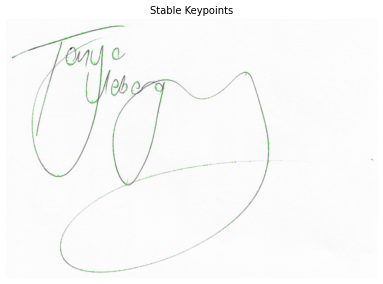

In [6]:
# Visualize the stable keypoints
ref_db.visualize_stable()

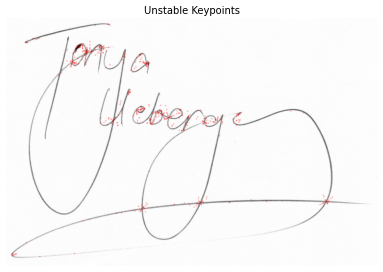

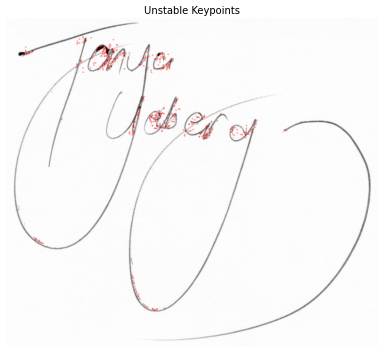

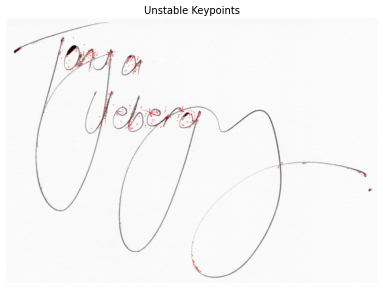

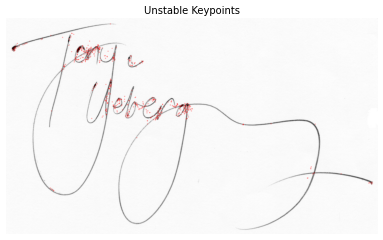

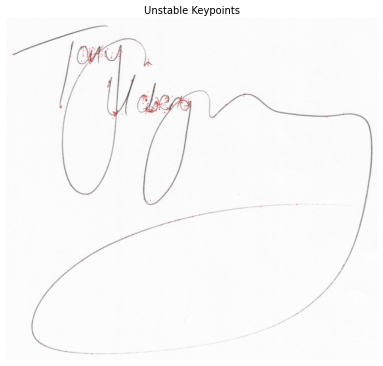

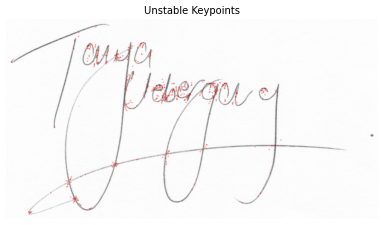

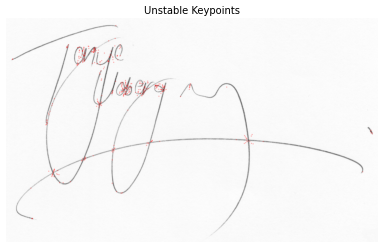

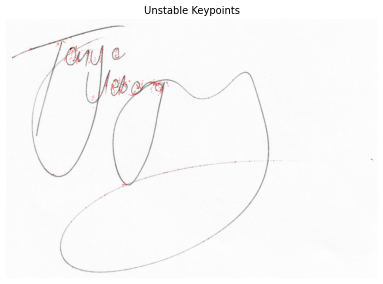

In [7]:
# Visualize the unstable keypoints
ref_db.visualize_unstable()

In [8]:
genuine_matches = Classifier().classify(genuine_path, stable_DB)
disguised_matches = Classifier().classify(disguised_path, stable_DB)
simulated_matches = Classifier().classify(simulated_path, stable_DB)

In [9]:
# Save the matches
with open('./pickles/matches.pkl', 'wb') as f:
    pickle.dump((genuine_matches, disguised_matches, simulated_matches), f)

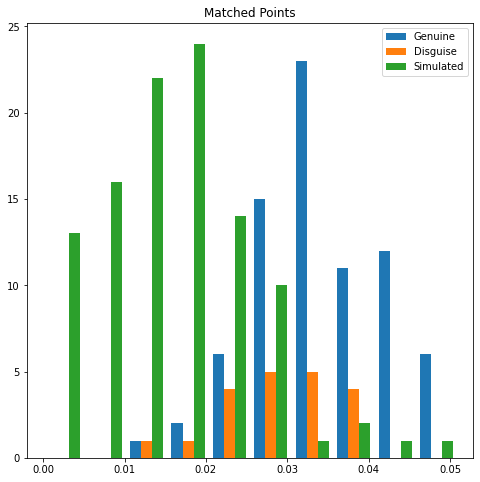

In [10]:
# Plot the matches
plt.figure(figsize = (8, 8))
match = [genuine_matches, disguised_matches, simulated_matches]
plt.hist(match, label=['Genuine', 'Disguise', 'Simulated'])
plt.legend()
plt.title('Matched Points')
plt.show()

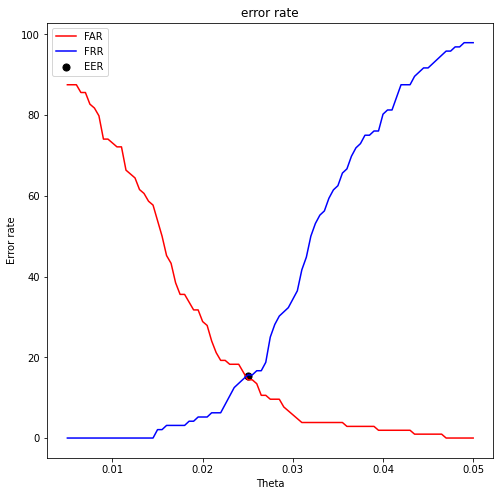

EER:  14.423076923076922


In [11]:
# Plot the error

error_plotter = ErrorPlotter(genuine_matches, disguised_matches, simulated_matches)
far, frr, eer = error_plotter.find_far_frr()
error_plotter.plot_error(0.11)
print('EER: ', eer)